In [18]:
from PIL import Image
import re
from os import listdir, makedirs
from os.path import join
import pandas as pd

experiment_prefix = 'cnn_conv'
app = 'yololite'
interest_variable = 'UN'

path = f'output_parsed_log_{experiment_prefix}'
files = [f for f in listdir(path) if f.endswith('.csv')]

pattern_name = re.compile(rf'parsed_{experiment_prefix}_cfg_{app}_CL(\d+)UN(\d+)LN(\d+)_log\.csv')

folder = f'output_data_{experiment_prefix}'
makedirs(folder, exist_ok=True)

DEFAULT_CL = 8
DEFAULT_UN = 8
DEFAULT_LN = 2

df_tmp = {
  'CL': [],
  'UN': [],
  'LN': []
}
df = pd.DataFrame()

for f in files:
  check = pattern_name.findall(f)
  if len(check) == 1:
    clusters, units, lanes = check[0]
    df_tmp['CL'].append(int(clusters))
    df_tmp['UN'].append(int(units))
    df_tmp['LN'].append(int(lanes))

    file_path = join(path, f)
    df_buffer = pd.read_csv(file_path, index_col=0)
    df = pd.concat([df, df_buffer])

    df.reset_index(drop=True, inplace=True)
  
df2 = pd.DataFrame(df_tmp)
df = pd.concat([df2, df], axis=1)
df

,CL,UN,LN,total_energy,average_power,total_time,avg_bw_Gb,avg_bw_GB,avg_bw_idle_Gb,avg_bw_idle_GB,max_bw_Gb,max_bw_GB,simulation_time
0,1,8,2,14.504144,353.66,41.011653,0.07,0.01,59.58,7.45,119.4,14.93,153.746
1,16,8,2,1.518814,374.23,4.058499,0.75,0.09,57.03,7.13,119.4,14.93,41.080
2,6,8,2,3.206529,362.14,8.854463,0.35,0.04,59.13,7.39,119.4,14.93,53.766
3,2,8,2,7.338991,355.87,20.622887,0.15,0.02,58.08,7.26,119.4,14.93,89.138
4,12,8,2,1.923489,368.88,5.214388,0.59,0.07,56.83,7.10,119.4,14.93,41.535
5,4,8,2,3.792475,360.34,10.524602,0.29,0.04,57.75,7.22,119.4,14.93,58.929
6,8,16,2,1.651051,374.18,4.412432,0.69,0.09,59.04,7.38,119.4,14.93,40.380
7,8,4,2,3.735174,360.13,10.371722,0.30,0.04,59.51,7.44,119.4,14.93,100.158
8,8,8,2,2.073860,368.28,5.631138,0.54,0.07,56.79,7.10,119.4,14.93,181.383
9,8,2,2,7.261067,355.59,20.419802,0.15,0.02,58.06,7.26,119.4,14.93,163.384


In [19]:
if interest_variable != 'CL':
  df = df[df['CL'] == DEFAULT_CL]
if interest_variable != 'UN':
  df = df[df['UN'] == DEFAULT_UN]
if interest_variable != 'LN':
  df = df[df['LN'] == DEFAULT_LN]
df = df.sort_values(by=interest_variable)
df

,CL,UN,LN,total_energy,average_power,total_time,avg_bw_Gb,avg_bw_GB,avg_bw_idle_Gb,avg_bw_idle_GB,max_bw_Gb,max_bw_GB,simulation_time
9,8,2,2,7.261067,355.59,20.419802,0.15,0.02,58.06,7.26,119.4,14.93,163.384
7,8,4,2,3.735174,360.13,10.371722,0.30,0.04,59.51,7.44,119.4,14.93,100.158
8,8,8,2,2.073860,368.28,5.631138,0.54,0.07,56.79,7.10,119.4,14.93,181.383
10,8,11,2,1.988458,368.69,5.393353,0.57,0.07,58.99,7.37,119.4,14.93,43.157
6,8,16,2,1.651051,374.18,4.412432,0.69,0.09,59.04,7.38,119.4,14.93,40.380


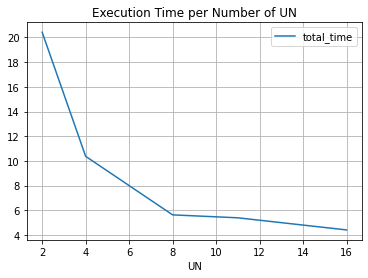

In [20]:
graph_name = 'total_time' + ".jpg"
df.plot(
  interest_variable, 'total_time', 
  grid=True,
  title=f'Execution Time per Number of {interest_variable}'
).get_figure().savefig(join(folder, graph_name))


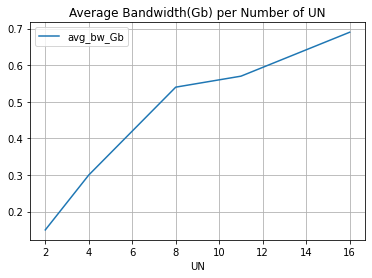

In [21]:
graph_name = 'avg_bw_Gb' + ".jpg"
df.plot(
  interest_variable, 'avg_bw_Gb', 
  grid=True,
  title=f'Average Bandwidth(Gb) per Number of {interest_variable}'
).get_figure().savefig(join(folder, graph_name))

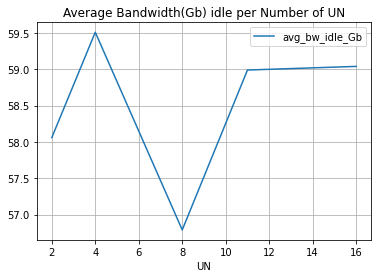

In [22]:
graph_name = 'avg_bw_idle_Gb' + ".jpg"
df.plot(
  interest_variable, 'avg_bw_idle_Gb', 
  grid=True,
  title=f'Average Bandwidth(Gb) idle per Number of {interest_variable}'
).get_figure().savefig(join(folder, graph_name))

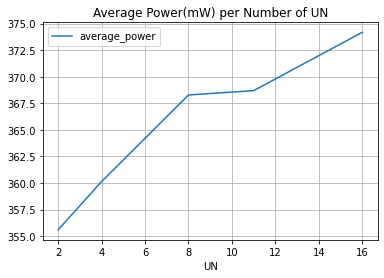

In [23]:
graph_name = 'average_power' + ".jpg"
df.plot(
  interest_variable, 'average_power', 
  grid=True,
  title=f'Average Power(mW) per Number of {interest_variable}'
).get_figure().savefig(join(folder, graph_name))

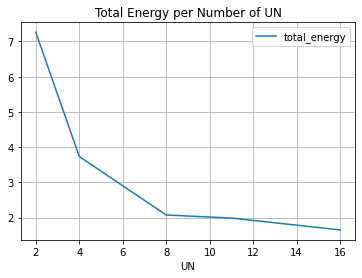

In [24]:
graph_name = 'total_energy' + ".jpg"
df.plot(
  interest_variable, 'total_energy', 
  grid=True,
  title=f'Total Energy per Number of {interest_variable}',
).get_figure().savefig(join(folder, graph_name))